# Analyse Exploratoire des Données


Ce notebook présente une analyse exploratoire des données pour le fichier `customer_details_v3.csv`. 
Les analyses incluent des statistiques descriptives, des visualisations de distributions, 
une analyse de la répartition géographique des clients, et une matrice de corrélation.


In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'customer_details_v3.csv'
customer_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
customer_data.head()


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,first_order,last_order,total_orders,connection_days,total_spent,avg_review_score,avg_freight_value,avg_price,avg_payment,avg_product_weight_g,avg_product_length_cm,avg_product_height_cm,avg_product_width_cm
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,-23.353453,-46.823060,2018-05-10 10:56:27,2018-05-10 10:56:27,1,1,141.90,5.0,12.00,129.90,141.90,1500.0,34.0,7.0,32.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,-23.568119,-46.792981,2018-05-07 11:11:27,2018-05-07 11:11:27,1,1,27.19,4.0,8.29,18.90,27.19,375.0,26.0,11.0,18.0
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,-27.561522,-48.637354,2017-03-10 21:05:03,2017-03-10 21:05:03,1,1,86.22,3.0,17.22,69.00,86.22,1500.0,25.0,50.0,35.0
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,-1.449059,-48.495507,2017-10-12 20:29:41,2017-10-12 20:29:41,1,1,43.62,4.0,17.63,25.99,43.62,150.0,19.0,5.0,11.0
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,-23.514883,-47.469016,2017-11-14 19:45:42,2017-11-14 19:45:42,1,1,196.89,5.0,16.89,180.00,196.89,6050.0,16.0,3.0,11.0


In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        96096 non-null  object 
 1   customer_zip_code_prefix  96096 non-null  int64  
 2   customer_city             96096 non-null  object 
 3   customer_state            96096 non-null  object 
 4   geolocation_lat           95828 non-null  float64
 5   geolocation_lng           95828 non-null  float64
 6   first_order               96096 non-null  object 
 7   last_order                96096 non-null  object 
 8   total_orders              96096 non-null  int64  
 9   connection_days           96096 non-null  int64  
 10  total_spent               96095 non-null  float64
 11  avg_review_score          95380 non-null  float64
 12  avg_freight_value         95420 non-null  float64
 13  avg_price                 95420 non-null  float64
 14  avg_pa

## Statistiques Descriptives

In [3]:

# Afficher les statistiques descriptives
stats_descriptives = customer_data.describe(include='all')
stats_descriptives


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,first_order,last_order,total_orders,connection_days,total_spent,avg_review_score,avg_freight_value,avg_price,avg_payment,avg_product_weight_g,avg_product_length_cm,avg_product_height_cm,avg_product_width_cm
count,96096,96096.000000,96096,96096,95828.000000,95828.000000,96096,96096,96096.000000,96096.000000,96095.000000,95380.000000,95420.000000,95420.000000,96095.000000,95407.000000,95407.000000,95407.000000,95407.000000
unique,96096,NaN,4118,27,NaN,NaN,95837,95834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0000366f3b9a7992bf8c76cfdf3221e2,NaN,sao paulo,SP,NaN,NaN,2018-07-28 13:11:22,2018-02-19 15:37:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,14971,40295,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,35185.761832,NaN,NaN,-21.223820,-46.182727,NaN,NaN,1.034809,1.024809,166.594226,4.084989,20.226742,126.516509,158.708787,2107.146769,30.091259,16.515693,23.009480
std,NaN,29801.656868,NaN,NaN,5.614419,4.058972,NaN,NaN,0.214384,0.182052,231.428912,1.341571,15.821514,191.743686,219.491200,3742.144110,15.993049,13.250372,11.641368
min,NaN,1003.000000,NaN,NaN,-36.605374,-72.456263,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,11405.000000,NaN,NaN,-23.602516,-48.106438,NaN,NaN,1.000000,1.000000,63.120000,4.000000,13.370000,42.900000,60.850000,300.000000,18.000000,8.000000,15.000000
50%,NaN,24440.000000,NaN,NaN,-22.952815,-46.633398,NaN,NaN,1.000000,1.000000,108.000000,5.000000,16.400000,79.080000,103.750000,700.000000,25.000000,13.000000,20.000000
75%,NaN,59035.500000,NaN,NaN,-20.176276,-43.640431,NaN,NaN,1.000000,1.000000,183.530000,5.000000,21.220000,139.900000,175.080000,1825.000000,38.000000,20.000000,30.000000


## Distribution des Montants Totaux Dépensés

/Users/anthonydavid/miniconda3/envs/OC-env-2/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


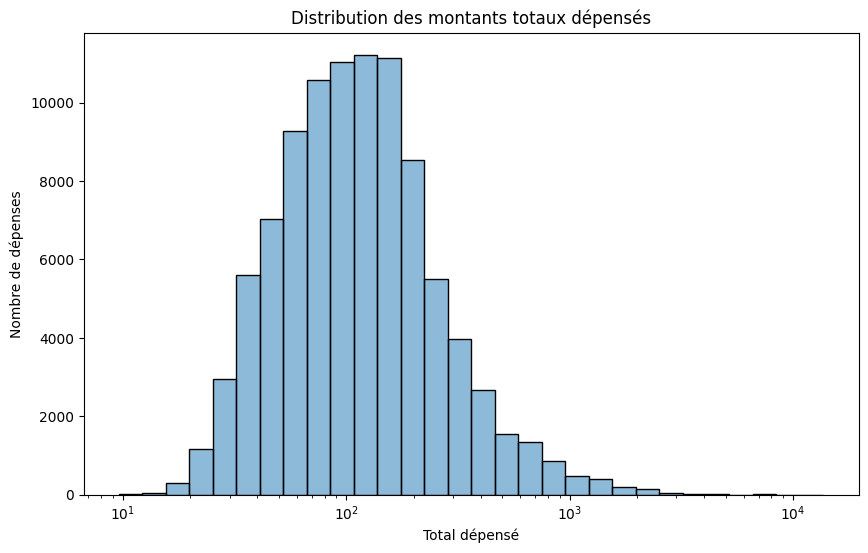

In [16]:
import numpy as np
# Visualiser la distribution des montants totaux dépensés
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['total_spent'], kde=True, bins=30, log_scale=True)
plt.title('Distribution des montants totaux dépensés')
plt.xlabel('Total dépensé')
plt.ylabel('Nombre de dépenses')
plt.show()


## Distribution des Scores Moyens des Avis

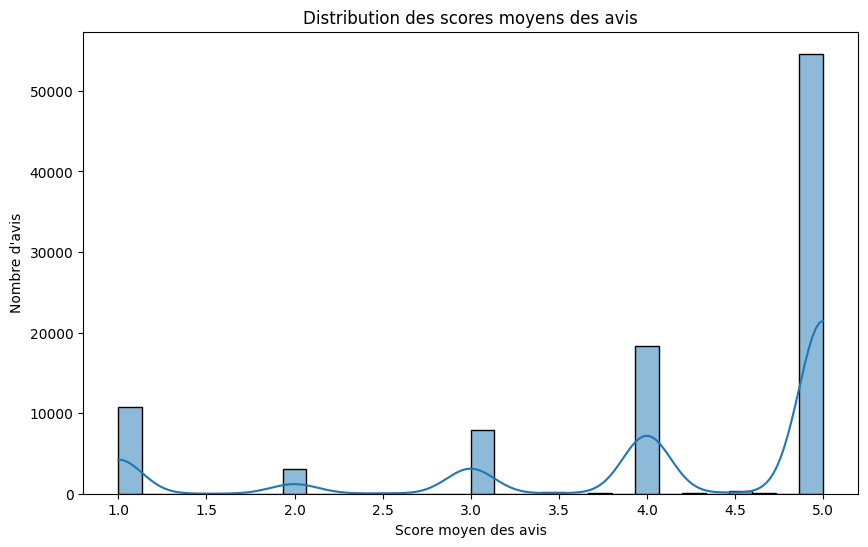

In [15]:

# Visualiser la distribution des scores moyens des avis
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['avg_review_score'], kde=True, bins=30)
plt.title('Distribution des scores moyens des avis')
plt.xlabel('Score moyen des avis')
plt.ylabel("Nombre d'avis")
plt.show()


## Répartition des Clients par État

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_60828/1389438923.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


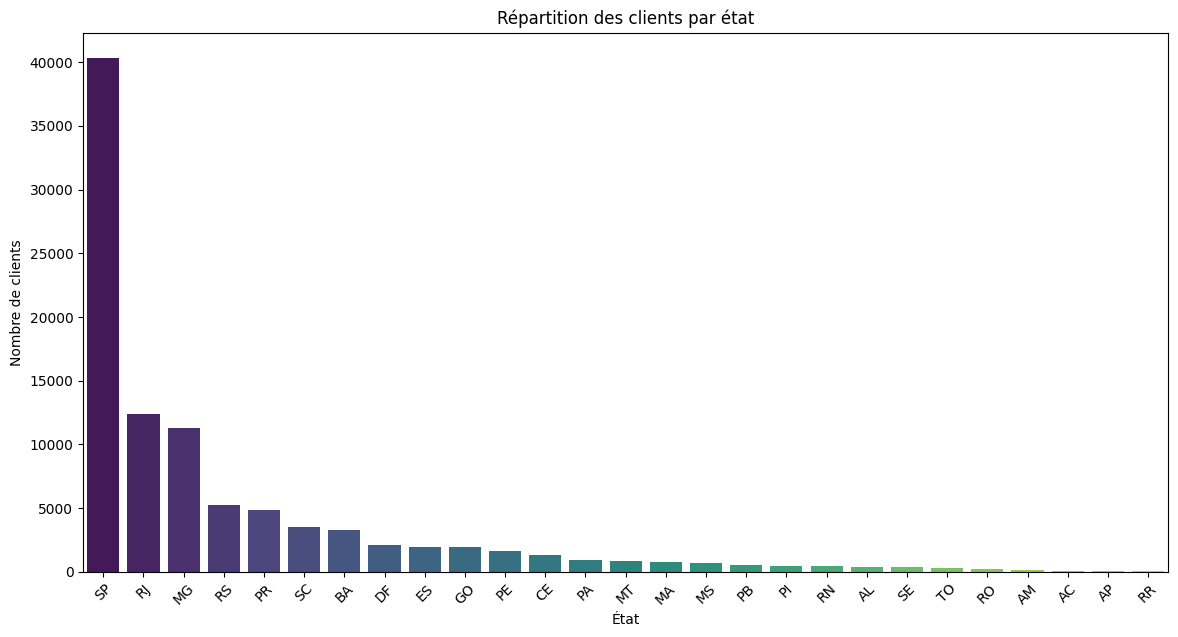

In [17]:

# Compter le nombre de clients par état
state_counts = customer_data['customer_state'].value_counts()

# Visualiser la répartition des clients par état
plt.figure(figsize=(14, 7))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Répartition des clients par état')
plt.xlabel('État')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.show()


## Matrice de Corrélation

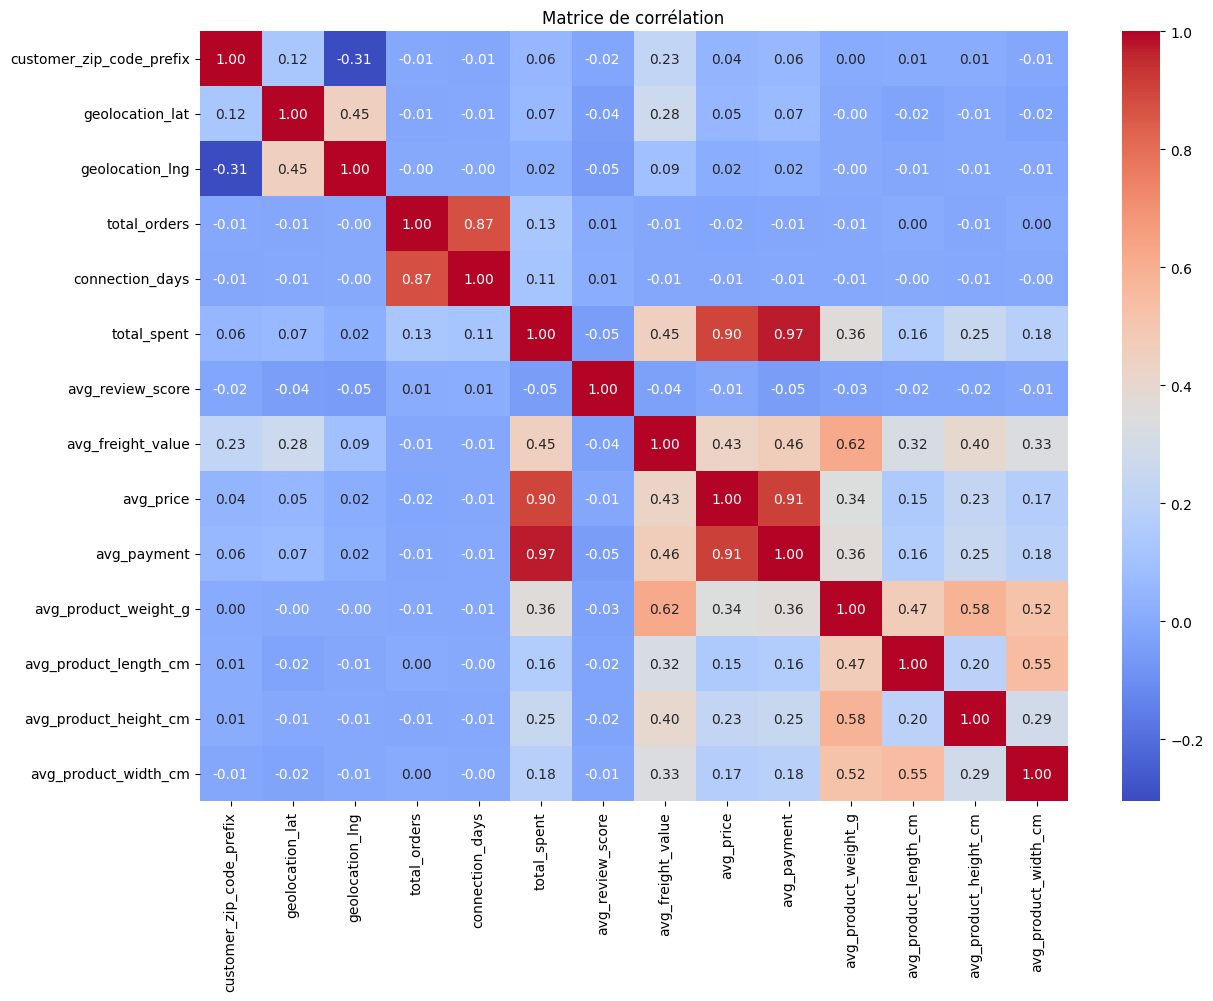

In [18]:

# Calculer la matrice de corrélation
corr_matrix = customer_data.corr(numeric_only=True)

# Visualiser la matrice de corrélation
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


## Pourcentage de clients connectés plus qu'une fois

In [6]:
# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Compter le nombre de clients connectés plus d'une fois
customers_connected_more_than_once = customer_data[customer_data['frequency'] > 1].shape[0]

# Calculer le pourcentage de ces clients par rapport au total
total_customers = customer_data.shape[0]
percentage_connected_more_than_once = (customers_connected_more_than_once / total_customers) * 100

customers_connected_more_than_once, percentage_connected_more_than_once

(2149, 2.2363053613053614)

## Pourcentage de clients qui ont commandé plus qu'une fois

In [8]:
# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['total_orders']

# Compter le nombre de clients connectés plus d'une fois
customers_connected_more_than_once = customer_data[customer_data['frequency'] > 1].shape[0]

# Calculer le pourcentage de ces clients par rapport au total
total_customers = customer_data.shape[0]
percentage_connected_more_than_once = (customers_connected_more_than_once / total_customers) * 100

customers_connected_more_than_once, percentage_connected_more_than_once

(2997, 3.1187562437562435)

## Distance au centre de distribution

In [2]:
import pandas as pd
import numpy as np

# Load the customer data
file_path = 'customer_details_v3.csv'  # Update with your actual file path
customer_data = pd.read_csv(file_path)

# Coordinates of Curitiba
curitiba_lat = -25.4284
curitiba_lng = -49.2733

# Haversine formula to calculate the distance
def haversine(lat1, lon1, lat2, lon2, unit='km'):
    if unit == 'km':
        R = 6371  # Radius of the Earth in kilometers
    elif unit == 'miles':
        R = 3958.8  # Radius of the Earth in miles
    else:
        raise ValueError("Unit must be either 'km' or 'miles'")
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Calculate distance from each customer to Curitiba
customer_data['distance_to_curitiba'] = customer_data.apply(
    lambda row: haversine(curitiba_lat, curitiba_lng, row['geolocation_lat'], row['geolocation_lng']), axis=1
)

# Save the updated dataset
customer_data.to_csv('customer_details_with_distances.csv', index=False)

# Display the first few rows to verify the new column
customer_data.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,first_order,last_order,total_orders,connection_days,total_spent,avg_review_score,avg_freight_value,avg_price,avg_payment,avg_product_weight_g,avg_product_length_cm,avg_product_height_cm,avg_product_width_cm,distance_to_curitiba
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,-23.353453,-46.823060,2018-05-10 10:56:27,2018-05-10 10:56:27,1,1,141.90,5.0,12.00,129.90,141.90,1500.0,34.0,7.0,32.0,338.811305
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,-23.568119,-46.792981,2018-05-07 11:11:27,2018-05-07 11:11:27,1,1,27.19,4.0,8.29,18.90,27.19,375.0,26.0,11.0,18.0,325.213236
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,-27.561522,-48.637354,2017-03-10 21:05:03,2017-03-10 21:05:03,1,1,86.22,3.0,17.22,69.00,86.22,1500.0,25.0,50.0,35.0,245.488572
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,-1.449059,-48.495507,2017-10-12 20:29:41,2017-10-12 20:29:41,1,1,43.62,4.0,17.63,25.99,43.62,150.0,19.0,5.0,11.0,2667.684791
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,-23.514883,-47.469016,2017-11-14 19:45:42,2017-11-14 19:45:42,1,1,196.89,5.0,16.89,180.00,196.89,6050.0,16.0,3.0,11.0,280.377048


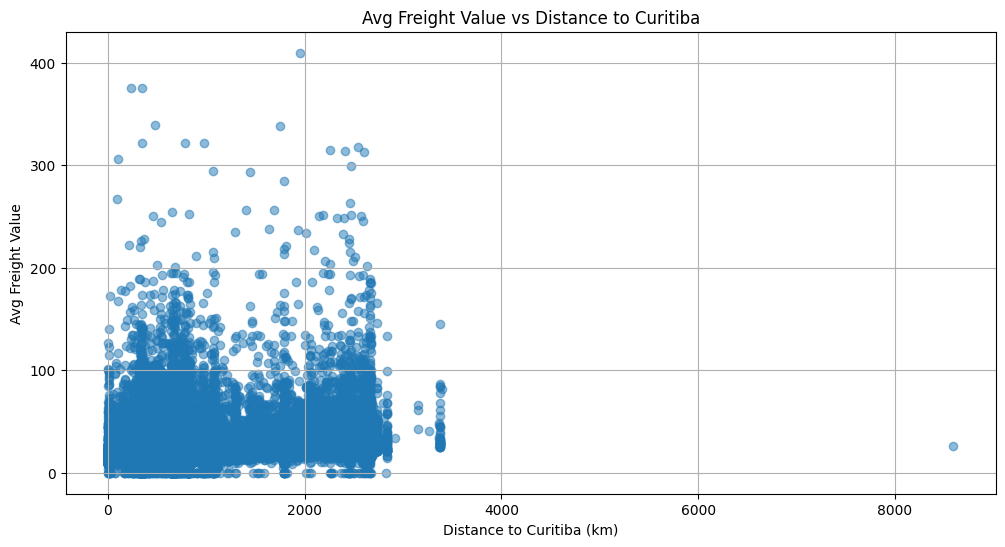

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated customer data with distances
file_path = 'customer_details_with_distances.csv'  # Update with your actual file path
customer_data = pd.read_csv(file_path)

# Plot avg_freight_value as a function of distance_to_curitiba
plt.figure(figsize=(12, 6))
plt.scatter(customer_data['distance_to_curitiba'], customer_data['avg_freight_value'], alpha=0.5)
plt.title('Avg Freight Value vs Distance to Curitiba')
plt.xlabel('Distance to Curitiba (km)')
plt.ylabel('Avg Freight Value')
plt.grid(True)
plt.show()

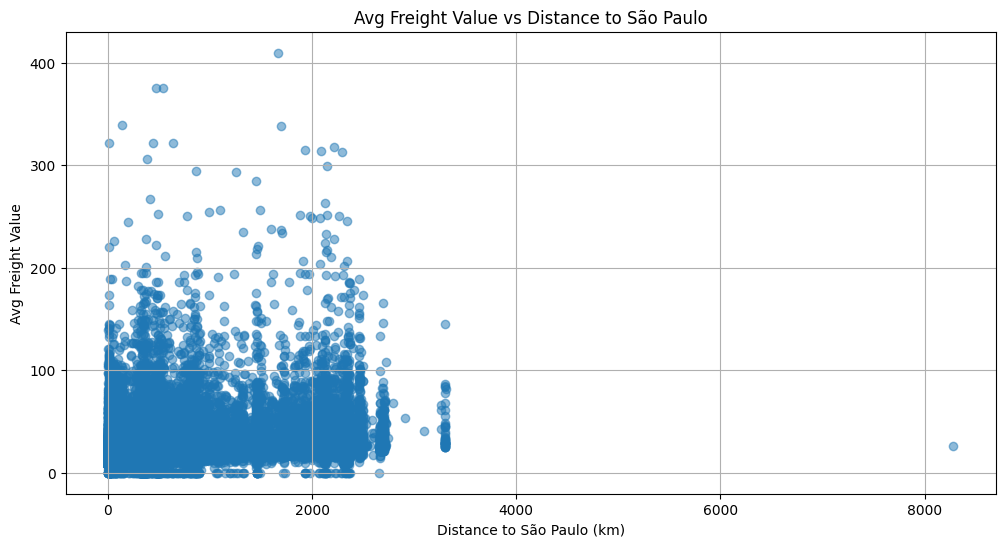

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the customer data
file_path = 'customer_details_v3.csv'  # Update with your actual file path
customer_data = pd.read_csv(file_path)

# Coordinates of São Paulo
sao_paulo_lat = -23.5505
sao_paulo_lng = -46.6333

# Haversine formula to calculate the distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Calculate distance from each customer to São Paulo
customer_data['distance_to_sao_paulo'] = customer_data.apply(
    lambda row: haversine(sao_paulo_lat, sao_paulo_lng, row['geolocation_lat'], row['geolocation_lng']), axis=1
)

# Save the updated dataset
customer_data.to_csv('customer_details_with_distances_sao_paulo.csv', index=False)

# Plot avg_freight_value as a function of distance_to_sao_paulo
plt.figure(figsize=(12, 6))
plt.scatter(customer_data['distance_to_sao_paulo'], customer_data['avg_freight_value'], alpha=0.5)
plt.title('Avg Freight Value vs Distance to São Paulo')
plt.xlabel('Distance to São Paulo (km)')
plt.ylabel('Avg Freight Value')
plt.grid(True)
plt.show()